# MACHINE LEARNING
**Lab-05: K-MEAN CLUSTERING**

---
*IDE: Colaboratory / Google Colab*

*Nguyen Duy Thanh - MSSV:18110013*

*email: duythanh.ndt273@gmail.com*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-05/data.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
#Check data có NULL hay không
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#Drop duplicates 
data.drop_duplicates(inplace=True)

In [16]:
X = data.iloc[:, [2, 3]].values
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)
np.random.seed(42)

# Câu 1 :

In [17]:
#gán label sau mỗi vòng lặp
def assign_label(X,centers):
    D=cdist(X,centers,'euclidean') #thư viện để tính khoảng cách euclidean
    return np.argmin(D,axis=1)

#gán các centroids sau mỗi vòng lặp
def update_centroids(X,label,K):
    center=np.zeros([K,X.shape[1]])
    for i in range(K):
        X_=X[label==i, :]
        center[i,:]=np.mean(X_,axis=0)
    return center

#Check xem đã hội tụ chưa
def has_converged(new_label,old_label):
    return (new_label==old_label).all()

#Khởi tạo các centroids
def init_centroids(X,K):
    centroids = X[np.random.choice(X.shape[0],K,replace = False)]
    return centroids

# Tính tổng bình phương sai số (SSE - Sum of squared distances )
def SSE(X, centroids):
    D = cdist(X, centroids, 'euclidean')
    dist = np.min(D, axis=1)
    sse = sum(dist**2)
    return sse
    
# Thực hiện thuật toán K_mean ứng với K cụm 
def k_means(X,K):
    centroids = init_centroids(X,K)
    while True:
      #đánh label
      labels=assign_label(X,centroids)
      #lưu các centroids cũ
      old_centers=centroids.copy()
      centroids=update_centroids(X,labels,K)
      if has_converged(centroids,old_centers):
        break
    return (centroids,labels)

## Tìm số cụm thích hợp dựa trên tập training :


*   Mô tả labels ứng với việc chia K cụm



In [18]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
  (temp1,temp2) = k_means(X_train,k)
  print("K = ",k,"labels: ",temp2)
  Sum_of_squared_distances.append(float(SSE(X_train,temp1)))

K =  1 labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
K =  2 labels:  [1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0
 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0
 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1]
K =  3 labels:  [2 0 1 1 2 1 1 2 1 1 2 1 1 1 2 1 2 0 0 1 1 2 0 2 2 1 1 2 2 0 1 2 2 1 2 2 1
 1 1 1 2 2 1 1 1 2 0 1 2 1 2 2 1 2 2 1 1 1 2 2 0 1 1 2 1 2 1 1 2 1 2 1 2 1
 0 0 0 2 1 2 2 1 1 1 1 0 1 2 2 2 1 1 2 2 0 1 1 0 2 2 1 2 0 2 2 1 2 2 1 0 1
 2 1 0 2 2 1 1 1 1 1 1 1 1 1 0 2 0 2 1 2 1 0 1]
K =  4 labels:  [3 0 3 2 1 2 2 1 3 2 1 2 2 2 1 3 3 0 0 3 2 1 0 1 1 2 3 1 1 0 2 1 1 2 1 3 2
 2 3 2 3 3 2 2 2 1 0 2 3 2 3 3 2 1 3 3 2 2

*   Vẽ đồ thị đường cong của WVC theo số cụm K

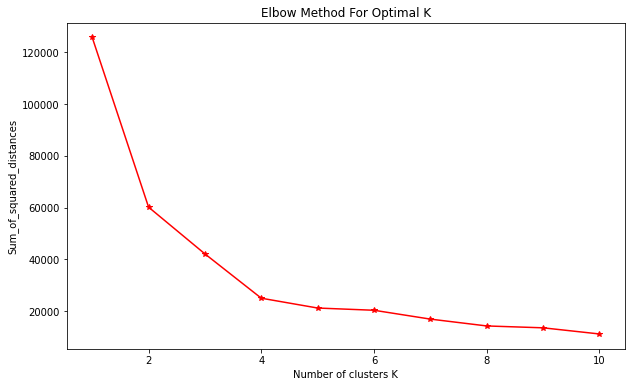

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(K, Sum_of_squared_distances, 'r*-')
plt.xlabel('Number of clusters K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal K')
plt.show()

Dựa trên đồ thị trên , ta áp dụng quy tắc khuỷu tay . Khi đó ta chọn được số phân cụm tối ưu là K = 4.
## Dự đoán label của các quan sát trên tập testing 

In [12]:
K = 4   # Từ đồ thị đường cong của WVC theo số cụm K
(temp1,temp2) = k_means(X_train,K)
labels_test=assign_label(X_test,temp1)
print("labels_test",labels_test)


labels_test [1 2 3 1 3 1 2 1 0 2 3 0 1 1 0 1 3 1 3 2 1 2 1 1 2 3 1 3 1 1 2 2 3 1 1 3 1
 1 1 3 3 0 2 3 1 0 2 2 1 3 1 1 2 1 3 3 1 3 1 3 1 1 2 3 2 3]


# Câu 2:
Vẽ hình các cụm trên tập testing :

Centers found by our algorithm:
 [[ 43.38888889  63.38888889]
 [ 52.35294118  36.29411765]
 [ 64.85714286  56.        ]
 [ 22.75        59.08333333]
 [ 33.41666667  93.16666667]
 [ 29.68421053  76.94736842]
 [ 28.03703704  27.37037037]
 [ 53.6         83.        ]
 [ 38.25       110.5       ]
 [ 31.         137.        ]]


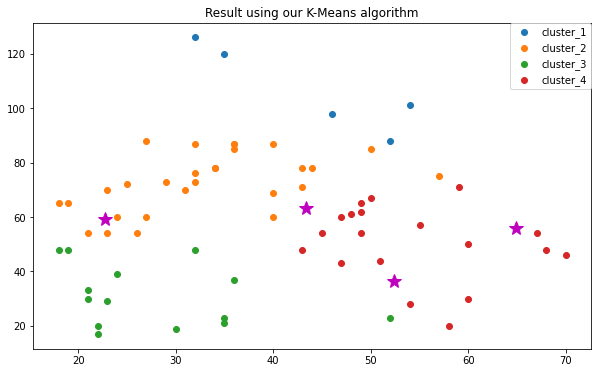

[0 1 2 3]


In [20]:
print('Centers found by our algorithm:\n', temp1)
X1 = X_test
y = labels_test
centers = temp1
label = np.unique(labels_test)

#Minh hoạ kết quả
fig, ax = plt.subplots(figsize=(10, 6))
for i in label:
    ax.scatter(X1[y == i][:, 0], X1[y == i][:, 1], label = 'cluster_' + str(i+1))
    ax.plot(centers[i][0], centers[i][1], 'm'+'*', markersize = 15) # Vẽ tâm cụm i lên đồ thị
plt.legend(bbox_to_anchor=(1, 1), ncol=1, borderaxespad=0.)
plt.title('Result using our K-Means algorithm')
plt.show()

# Kiểm Tra Bằng Thư Viện Sklearn

In [ ]:
import matplotlib
import matplotlib.pyplot
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

In [ ]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
  kmeans = KMeans(n_clusters=k, init='random')
  kmeans.fit(X_train)
  
  labels = kmeans.labels_
  print("k = ",k,"labels: ",labels)

  # Sum of distances of samples to their closest cluster center
  tmp=kmeans.inertia_
  Sum_of_squared_distances.append(tmp)
  # 	Sum_of_squared_distances.append(kmeans.inertia_)

k =  1 labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
k =  2 labels:  [0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1
 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1
 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0]
k =  3 labels:  [0 2 0 2 1 2 2 1 0 2 1 2 2 2 1 0 0 2 2 0 2 1 2 1 1 2 0 1 1 2 2 1 1 2 1 0 2
 2 0 2 0 0 2 2 2 1 2 2 0 2 0 0 2 1 0 0 2 2 1 1 2 2 0 1 2 1 2 2 1 2 1 2 0 2
 2 2 2 1 0 0 1 0 2 0 2 2 0 0 1 0 2 2 1 0 2 2 2 2 0 0 0 0 2 1 1 0 1 0 2 2 2
 1 2 2 1 1 2 2 2 2 2 0 1 0 2 2 1 2 0 0 1 0 2 0]
k =  4 labels:  [3 2 3 0 1 0 0 1 3 0 1 0 0 0 1 3 3 2 2 3 0 1 2 1 1 0 3 1 1 2 0 1 1 0 1 3 0
 0 3 0 3 3 0 0 0 1 2 0 3 0 3 3 0 1 3 3 0 0

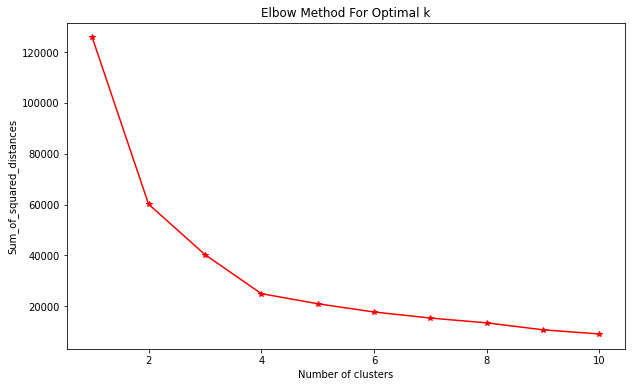

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(K, Sum_of_squared_distances, 'r*-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()